In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from time import time
import heapq
import numpy as np
from scipy.spatial import KDTree

## 1

In [28]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [29]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## 2

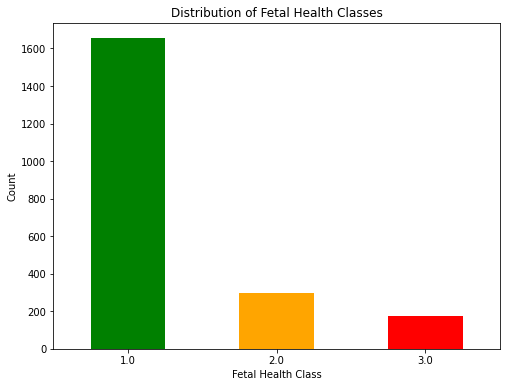

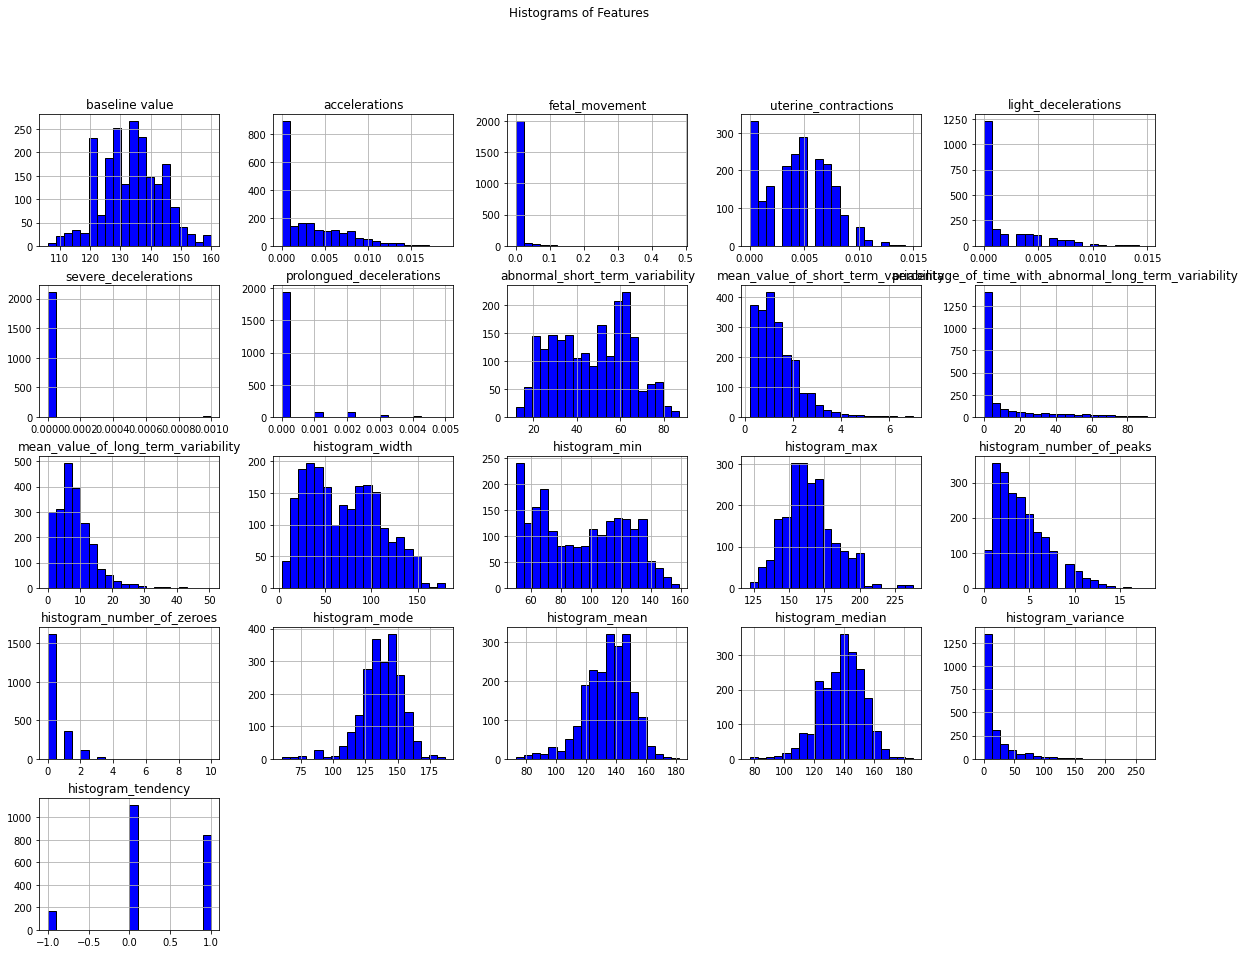

In [30]:
plt.figure(figsize=(8, 6))
df['fetal_health'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

df.drop(columns=['fetal_health']).hist(figsize=(20, 15), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

## 3

In [31]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training Data Size: {len(train_data)} records")
print(f"Test Data Size: {len(test_data)} records")

Training Data Size: 1700 records
Test Data Size: 426 records


## 4

In [32]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy
report = classification_report(y_test, y_pred)

print(f"Accuracy of 1-NN classifier: {accuracy:.2f}")
print(f"Test Error (Empirical Error Rate): {test_error:.2f}")
print("\nClassification Report:\n", report)


Accuracy of 1-NN classifier: 0.88
Test Error (Empirical Error Rate): 0.12

Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.94      0.93       333
         2.0       0.67      0.66      0.66        64
         3.0       0.88      0.72      0.79        29

    accuracy                           0.88       426
   macro avg       0.82      0.77      0.80       426
weighted avg       0.88      0.88      0.88       426



## 5

In [33]:
k_values = [1, 3, 5, 7, 9, 11, 13]
test_errors = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - accuracy
    test_errors.append(test_error)
    
    print(f"Test Error for k={k}: {test_error:.2f}")

optimal_k = k_values[test_errors.index(min(test_errors))]
optimal_test_error = min(test_errors)

print(f"\nOptimal value of k: {optimal_k}")
print(f"Test Error for optimal k={optimal_k}: {optimal_test_error:.2f}")

Test Error for k=1: 0.12
Test Error for k=3: 0.11
Test Error for k=5: 0.13
Test Error for k=7: 0.11
Test Error for k=9: 0.11
Test Error for k=11: 0.11
Test Error for k=13: 0.10

Optimal value of k: 13
Test Error for optimal k=13: 0.10


## 6

In [34]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def heap_knn(X_train, y_train, query_point, k):
    heap = []
    
    for i in range(k):
        distance = euclidean_distance(X_train[i], query_point)
        heapq.heappush(heap, (-distance, i))
    
    for i in range(k, len(X_train)):
        distance = euclidean_distance(X_train[i], query_point)
        if -heap[0][0] > distance:
            heapq.heappop(heap)  
            heapq.heappush(heap, (-distance, i)) 
    
    nearest_indices = [index for (_, index) in heap]
    
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()

def brute_force_knn(X_train, y_train, query_point, k):
    distances = [euclidean_distance(x, query_point) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()

df = pd.read_csv('fetal_health.csv')
X = df.drop(columns=['fetal_health']).values
y = df['fetal_health'].values.astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
heap_predictions = []
brute_force_predictions = []

start_time = time()
for query in X_test:
    heap_predictions.append(heap_knn(X_train, y_train, query, k))
heap_time = time() - start_time

start_time = time()
for query in X_test:
    brute_force_predictions.append(brute_force_knn(X_train, y_train, query, k))
brute_force_time = time() - start_time

heap_accuracy = accuracy_score(y_test, heap_predictions)
brute_force_accuracy = accuracy_score(y_test, brute_force_predictions)

print(f"Heap-based k-NN Time: {heap_time:.4f} seconds, Accuracy: {heap_accuracy:.2f}")
print(f"Brute-force k-NN Time: {brute_force_time:.4f} seconds, Accuracy: {brute_force_accuracy:.2f}")


Heap-based k-NN Time: 5.1113 seconds, Accuracy: 0.87
Brute-force k-NN Time: 4.6237 seconds, Accuracy: 0.87


In [35]:
df = pd.read_csv('fetal_health.csv')
X = df.drop(columns=['fetal_health']).values
y = df['fetal_health'].values.astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def kd_tree_knn(X_train, y_train, query_points, k):
    kd_tree = KDTree(X_train)
    predictions = []

    for query_point in query_points:
        distances, indices = kd_tree.query(query_point, k=k)
        nearest_labels = y_train[indices]

        predicted_label = np.bincount(nearest_labels).argmax()
        predictions.append(predicted_label)
    
    return predictions

k = 5

start_time = time()
kd_tree_predictions = kd_tree_knn(X_train, y_train, X_test, k)
kd_tree_time = time() - start_time

brute_force_predictions = []
start_time = time()
for query in X_test:
    brute_force_predictions.append(brute_force_knn(X_train, y_train, query, k))
brute_force_time = time() - start_time

heap_predictions = []
start_time = time()
for query in X_test:
    heap_predictions.append(heap_knn(X_train, y_train, query, k))
heap_time = time() - start_time

kd_tree_accuracy = accuracy_score(y_test, kd_tree_predictions)
brute_force_accuracy = accuracy_score(y_test, brute_force_predictions)
heap_accuracy = accuracy_score(y_test, heap_predictions)

print(f"KD-Tree-based k-NN Time: {kd_tree_time:.4f} seconds, Accuracy: {kd_tree_accuracy:.2f}")
print(f"Heap-based k-NN Time: {heap_time:.4f} seconds, Accuracy: {heap_accuracy:.2f}")
print(f"Brute-force k-NN Time: {brute_force_time:.4f} seconds, Accuracy: {brute_force_accuracy:.2f}")


KD-Tree-based k-NN Time: 0.0230 seconds, Accuracy: 0.87
Heap-based k-NN Time: 4.6256 seconds, Accuracy: 0.87
Brute-force k-NN Time: 4.5010 seconds, Accuracy: 0.87
